## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features X: p variáveis independentes, sendo uma matriz de dimensão nxp;
* Variável Target/Dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
#pip install -U scikit-learn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import metrics

In [4]:
nome_arq = 'Regress_ex1.xls'

In [5]:
df = pd.read_excel(nome_arq)
df.head(3)

,Funcionário,Tempo,Quantidade de clientes
0,Beto,2,48
1,Nivia,3,50
2,Bina,4,56


In [6]:
df_quant = df.iloc[:,1:3]
df_quant.columns

Index(['Tempo', 'Quantidade de clientes'], dtype='object')

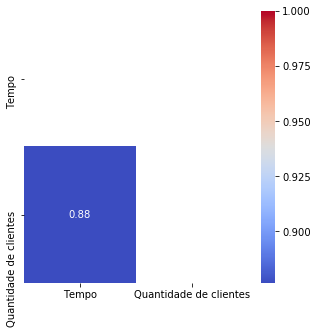

In [7]:
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [8]:
xrot = 'tempo'
xcol = 1
yrot = 'qtde_clientes'
ycol = 2
titulo = 'Regressão Linear'

In [9]:
df.rename(columns= {df.columns[xcol]: xrot,
                   df.columns[ycol]: yrot}, inplace=True)
df.columns

Index(['Funcionário', 'tempo', 'qtde_clientes'], dtype='object')

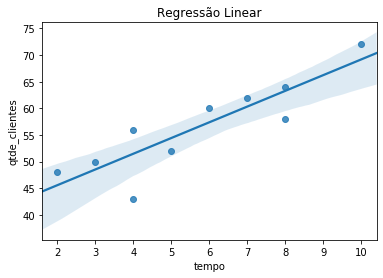

In [10]:
sns.regplot(x= xrot, y= yrot, data=df)
#sns.despine()   # remove the top and right spines from plot
plt.title(titulo)
plt.xlabel(xrot)
plt.ylabel(yrot)
#plt.savefig(nomefig)
plt.show()

In [11]:
X = df[xrot].values.reshape(-1,1)
y = df[yrot].values

In [12]:
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [10]], dtype=int64)

In [13]:
y

array([48, 50, 56, 52, 43, 60, 62, 58, 64, 72], dtype=int64)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [16]:
y_train

array([52, 50, 72, 48, 60, 43, 62, 58], dtype=int64)

<img src= 'Architecture.png'>

## Parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$f;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

# Limitações do OLS:
* Impactado por Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

In [14]:
# instanciar
lr = LinearRegression()
#lr.fit(X_train, y_train)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# valores preditos de y
y_pred = lr.predict(X)

In [16]:
F, p_value = feature_selection.f_regression(X, y)

In [17]:
d_df = {'intercepto':[lr.intercept_], 'coef':lr.coef_[0], 'F': F[0], 'p_value': p_value[0],'R2':metrics.r2_score(y, y_pred), 'score': lr.score(X,y)}
pd.DataFrame(d_df, index=['regressão linear'])

,intercepto,coef,F,p_value,R2,score
regressão linear,39.674699,2.951807,26.597563,0.000867,0.76877,0.76877


### Se p_value < 0.05 ==> variável significativa/relevante para o modelo
The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

In [65]:
y = lambda x: lr.coef_[0] * x + lr.intercept_

In [69]:
# modelo de predição
int(y(8) // 1)

63

In [17]:
lr.predict(np.array([[8]]))

array([63.28915663])